In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt



In [3]:
behaviour = pd.read_csv("QVI_purchase_behaviour.csv")
transactions = pd.read_excel("QVI_transaction_data.xlsx")


Creating and interpreting high-level summaries of the data
Finding outliers and removing these (if applicable)
Checking data formats and correcting (if applicable)
extra features: size of packages and brand names 
are customers spending more per packet over time? Or are there more customers than chip purchases? So are customers multipack buyers? 

The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  



In [4]:
print(len(behaviour))
print(len(transactions))

print(transactions.head())
print(behaviour.head())

72637
264836
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3     

In [5]:
print("Inspect dataset")
print(transactions.info())

print("Convert dates")
excel_start_date = datetime(1899, 12, 30)
transactions['INT_DATE'] = transactions['DATE']
transactions['DATE'] = transactions['INT_DATE'].apply(lambda x: excel_start_date + timedelta(days=x))


Inspect dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
Convert dates


In [6]:
from collections import Counter

# create list of words
all_words_list = transactions['PROD_NAME'].apply(lambda x : x.split()).tolist()
all_words_list = [x for sublist in all_words_list for x in sublist]
all_words_list = [x for x in all_words_list if x.isalpha()]
word_counts = Counter(all_words_list)
print(word_counts)

# filter out sals and dip
transactions = transactions[~transactions['PROD_NAME'].str.contains("Dip|Salsa")]

Counter({'Chips': 49770, 'Kettle': 41288, 'Smiths': 28860, 'Salt': 27976, 'Cheese': 27890, 'Pringles': 25102, 'Doritos': 24962, 'Crinkle': 23960, 'Corn': 22063, 'Original': 21560, 'Cut': 20754, 'Chip': 18645, 'Salsa': 18094, 'Chicken': 15407, 'Sea': 14145, 'Thins': 14075, 'Sour': 13882, 'Crisps': 12607, 'Vinegar': 12402, 'Chilli': 12389, 'RRD': 11894, 'Infuzions': 11057, 'Supreme': 10963, 'WW': 10320, 'Cobs': 9693, 'Popd': 9693, 'Tortilla': 9580, 'Tostitos': 9471, 'Twisties': 9454, 'Sensations': 9429, 'Old': 9324, 'El': 9324, 'Paso': 9324, 'Dip': 9324, 'Sweet': 7883, 'Lime': 7852, 'Tomato': 7669, 'Cream': 7618, 'Thinly': 7507, 'Tyrrells': 6442, 'And': 6373, 'BBQ': 6351, 'Tangy': 6332, 'Grain': 6272, 'Waves': 6272, 'Lightly': 6248, 'Salted': 6248, 'Soy': 6121, 'Natural': 6050, 'Mild': 6048, 'Red': 5885, 'Rock': 5885, 'Deli': 5885, 'Thai': 4737, 'Burger': 4733, 'Swt': 4718, 'Chives': 4687, 'Honey': 4661, 'Nacho': 4658, 'Potato': 4647, 'Cheezels': 4603, 'CCs': 4551, 'Woolworths': 4437, 'M

In [7]:
desc = transactions.describe()
info = transactions.info()

print(desc)
print(info)

<class 'pandas.core.frame.DataFrame'>
Index: 245304 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            245304 non-null  datetime64[ns]
 1   STORE_NBR       245304 non-null  int64         
 2   LYLTY_CARD_NBR  245304 non-null  int64         
 3   TXN_ID          245304 non-null  int64         
 4   PROD_NBR        245304 non-null  int64         
 5   PROD_NAME       245304 non-null  object        
 6   PROD_QTY        245304 non-null  int64         
 7   TOT_SALES       245304 non-null  float64       
 8   INT_DATE        245304 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 18.7+ MB
                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         245304  245304.000000    2.453040e+05   
mean   2018-12-30 01:25:33.196360448     135.053322    1.355352e+05   
min              

In [8]:
print(transactions[transactions['PROD_QTY'] > 100])

transactions[transactions['LYLTY_CARD_NBR'] == 226000]

# filter out large customer
transactions = transactions[transactions['LYLTY_CARD_NBR'] != 226000]

print(transactions.describe())


            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  INT_DATE  
69762  Dorito Corn Chp     Supreme 380g       200      650.0     43331  
69763  Dorito Corn Chp     Supreme 380g       200      650.0     43605  
                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         245302  245302.000000    2.453020e+05   
mean   2018-12-30 01:25:30.420461056     135.052580    1.355344e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001400e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030860e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std              

Counter({Timestamp('2018-12-24 00:00:00'): 859, Timestamp('2018-12-23 00:00:00'): 843, Timestamp('2018-12-22 00:00:00'): 838, Timestamp('2018-12-19 00:00:00'): 831, Timestamp('2018-12-20 00:00:00'): 802, Timestamp('2018-12-18 00:00:00'): 798, Timestamp('2018-12-21 00:00:00'): 777, Timestamp('2019-06-07 00:00:00'): 754, Timestamp('2018-09-06 00:00:00'): 741, Timestamp('2019-06-14 00:00:00'): 740, Timestamp('2018-09-23 00:00:00'): 734, Timestamp('2018-11-20 00:00:00'): 731, Timestamp('2019-04-20 00:00:00'): 728, Timestamp('2019-05-19 00:00:00'): 726, Timestamp('2018-12-17 00:00:00'): 725, Timestamp('2018-07-13 00:00:00'): 725, Timestamp('2018-11-11 00:00:00'): 724, Timestamp('2019-03-15 00:00:00'): 723, Timestamp('2019-06-15 00:00:00'): 722, Timestamp('2018-09-25 00:00:00'): 722, Timestamp('2018-10-09 00:00:00'): 721, Timestamp('2019-03-05 00:00:00'): 720, Timestamp('2018-11-19 00:00:00'): 719, Timestamp('2019-03-22 00:00:00'): 719, Timestamp('2018-10-26 00:00:00'): 716, Timestamp('2018-

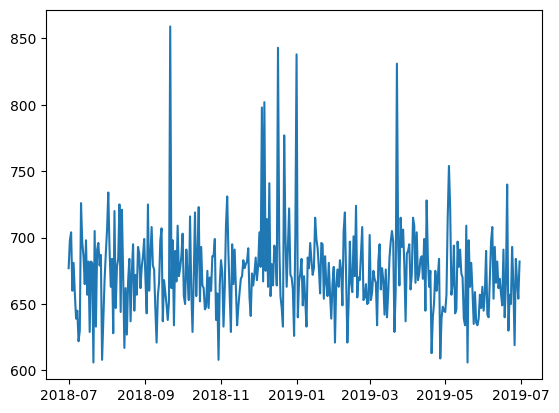

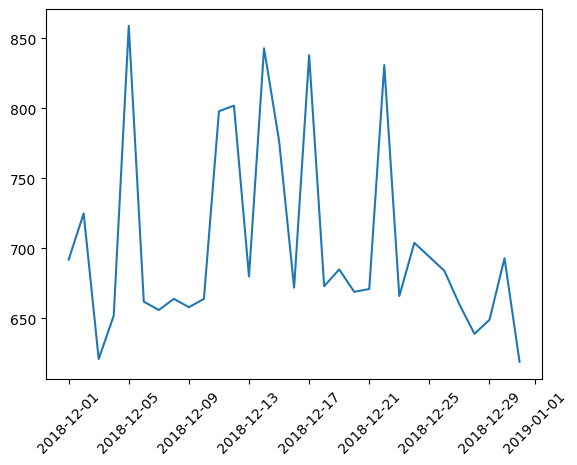

In [9]:
#THIS CODE DOESN'T WORK
date_counts = Counter(transactions['DATE'])
print(date_counts)

labels, values = zip(*date_counts.items())

date_list = pd.date_range(datetime(2018, 7, 1), datetime(2019, 6, 30) - timedelta(days=1),freq='d').tolist()
datas_date_list = transactions['DATE'].unique()
outstanding_date = [d for d in date_list if d not in datas_date_list]
print(outstanding_date)

plt.plot(sorted(labels), values)
plt.show()

december_date_counts = {key: date_counts[key] for key in date_counts.keys() if key.month_name() == "December"}
labels, values = zip(*december_date_counts.items())

plt.plot(sorted(labels), values)
plt.xticks(rotation=45)
plt.show()


DATE
2018-07-01    657
2018-07-02    647
2018-07-03    667
2018-07-04    667
2018-07-05    654
             ... 
2019-06-26    657
2019-06-27    666
2019-06-28    670
2019-06-29    695
2019-06-30    698
Name: count, Length: 364, dtype: int64


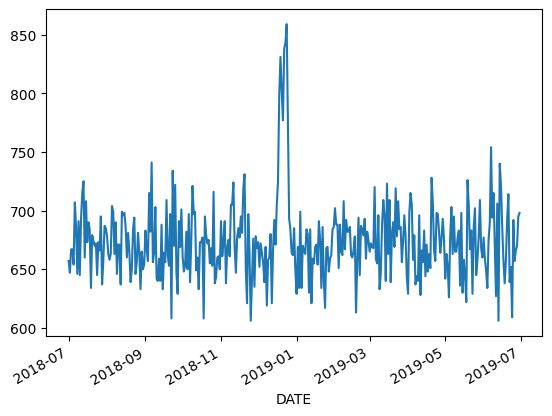

<Axes: xlabel='DATE'>

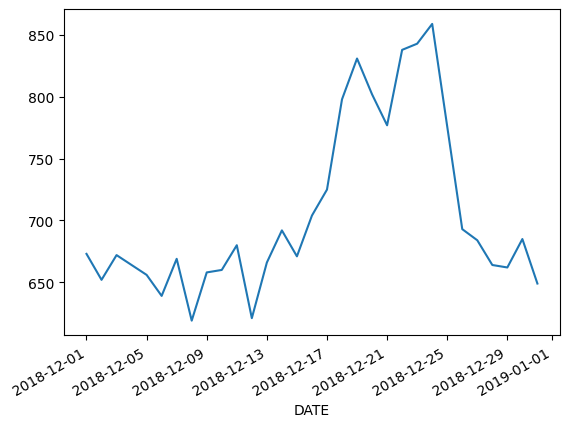

In [10]:
# Count occurrences of each date
date_counts = transactions['DATE'].value_counts().sort_index()
print(date_counts)
date_counts.plot()
plt.show()

december_date_counts = transactions['DATE'].loc[transactions['DATE'].apply(lambda x : x.month_name() == "December")].value_counts().sort_index()
december_date_counts.plot()

<Axes: xlabel='PROD_SIZE'>

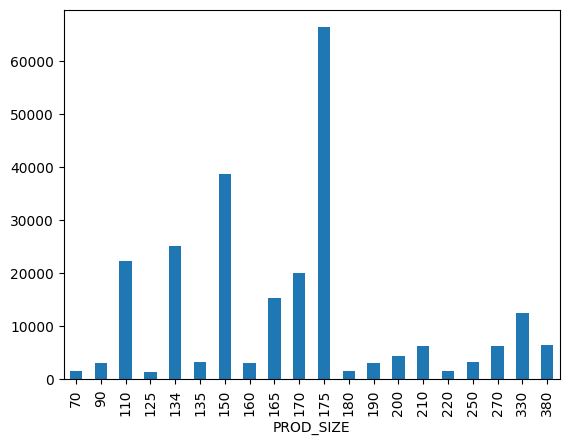

In [11]:
import re

# turn prod size into integer type
pd.options.display.max_rows = 150
transactions['PROD_SIZE'] = transactions['PROD_NAME'].apply(lambda x : int(re.findall(r'\d+', x)[0]))
value_counts = transactions['PROD_SIZE'].value_counts().sort_index()
value_counts.plot(kind='bar')



In [12]:
print("add size of packages and brand names")
transactions['PROD_BRAND'] = transactions['PROD_NAME'].apply(lambda x: x.split()[0])

transactions['PROD_BRAND'] = transactions['PROD_BRAND'].replace("Red", "RRD")
transactions['PROD_BRAND'].value_counts()

add size of packages and brand names


PROD_BRAND
Kettle        41288
Smiths        25952
Pringles      25102
Doritos       22041
RRD           16321
Thins         14075
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

In [13]:
print("Check for duplicates")
print(pd.Series(transactions['TXN_ID']).is_unique)
print(pd.Series(behaviour['LYLTY_CARD_NBR']).is_unique)

print(transactions[transactions.duplicated(keep=False)])
transactions = transactions.drop_duplicates()
print(behaviour[behaviour.duplicated(keep=False)])

Check for duplicates
False
True
             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
124843 2018-10-01        107          107024  108462        45   
124845 2018-10-01        107          107024  108462        45   

                                     PROD_NAME  PROD_QTY  TOT_SALES  INT_DATE  \
124843  Smiths Thinly Cut   Roast Chicken 175g         2        6.0     43374   
124845  Smiths Thinly Cut   Roast Chicken 175g         2        6.0     43374   

        PROD_SIZE PROD_BRAND  
124843        175     Smiths  
124845        175     Smiths  
Empty DataFrame
Columns: [LYLTY_CARD_NBR, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


In [14]:

print("Check loyalty numbers are consistent")
print(transactions[~transactions['LYLTY_CARD_NBR'].isin(behaviour['LYLTY_CARD_NBR'])])

Check loyalty numbers are consistent
Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, INT_DATE, PROD_SIZE, PROD_BRAND]
Index: []


       LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]
             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20   

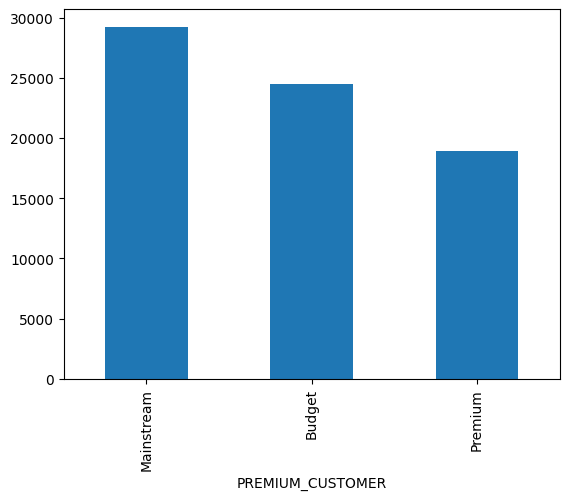

In [15]:
print(behaviour)
vc = behaviour['LIFESTAGE'].value_counts()
vc.plot(kind='bar')
vc = behaviour['PREMIUM_CUSTOMER'].value_counts()
vc.plot(kind='bar')

transactions = transactions.merge(behaviour, on='LYLTY_CARD_NBR', how='inner')
transactions.isnull().sum()
print(transactions)


             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
245296 2019-03-09        272          272319  270088        89   
245297 2018-08-13        272          272358  270154        74   
245298 2018-11-06        272          272379  270187        51   
245299 2018-12-27        272          272379  270188        42   
245300 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3   

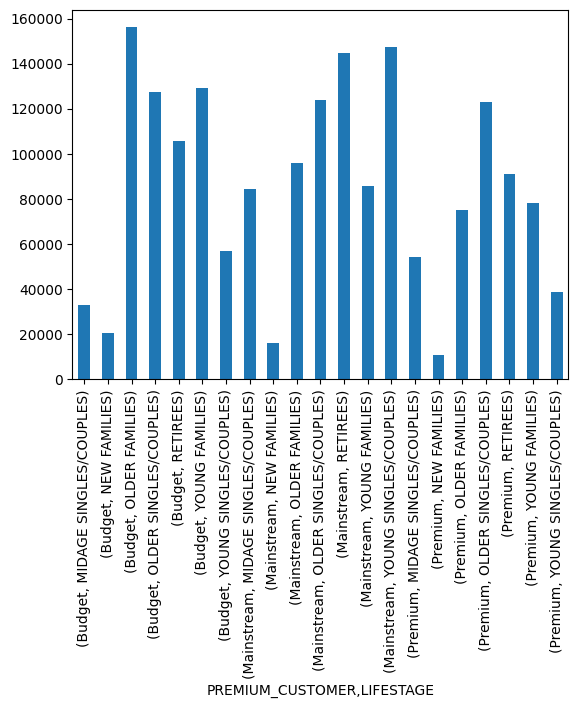

segment tally


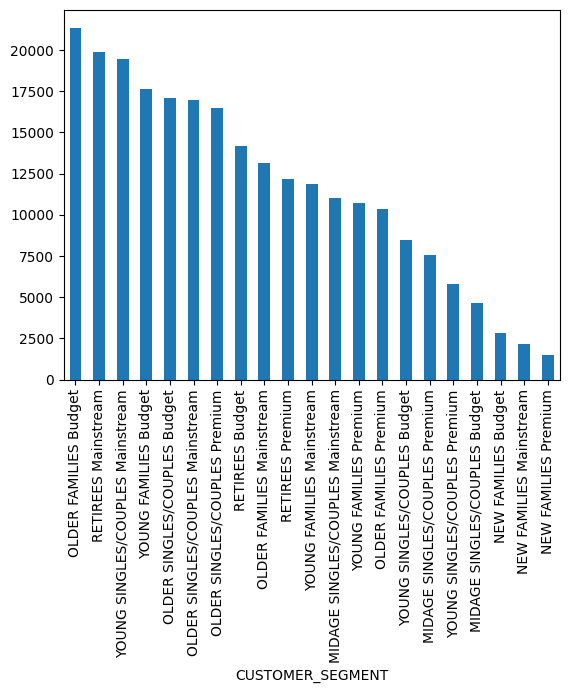

average quantity per transaction


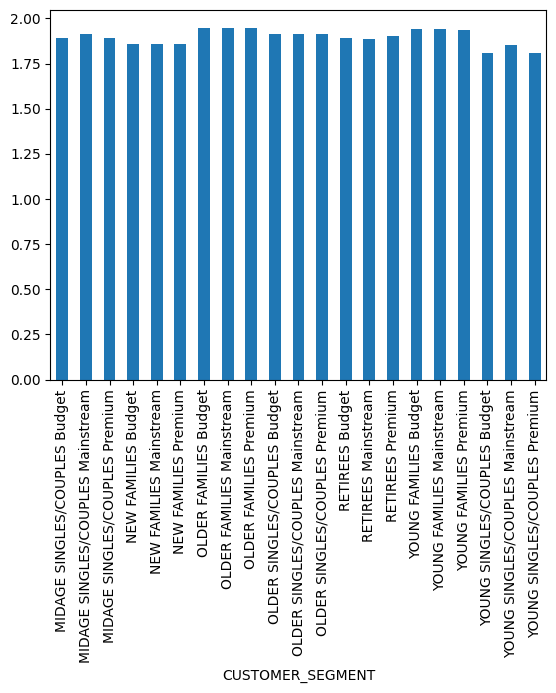

average packet price per unit across segments
CUSTOMER_SEGMENT
MIDAGE SINGLES/COUPLES Budget        3.753161
MIDAGE SINGLES/COUPLES Mainstream    4.000172
MIDAGE SINGLES/COUPLES Premium       3.776571
NEW FAMILIES Budget                  3.925196
NEW FAMILIES Mainstream              3.921576
NEW FAMILIES Premium                 3.877260
OLDER FAMILIES Budget                3.753436
OLDER FAMILIES Mainstream            3.743294
OLDER FAMILIES Premium               3.724567
OLDER SINGLES/COUPLES Budget         3.890437
OLDER SINGLES/COUPLES Mainstream     3.822764
OLDER SINGLES/COUPLES Premium        3.899515
RETIREES Budget                      3.930860
RETIREES Mainstream                  3.850556
RETIREES Premium                     3.927343
YOUNG FAMILIES Budget                3.768168
YOUNG FAMILIES Mainstream            3.732496
YOUNG FAMILIES Premium               3.770617
YOUNG SINGLES/COUPLES Budget         3.666196
YOUNG SINGLES/COUPLES Mainstream     4.071061
YOUNG SINGLES/COU

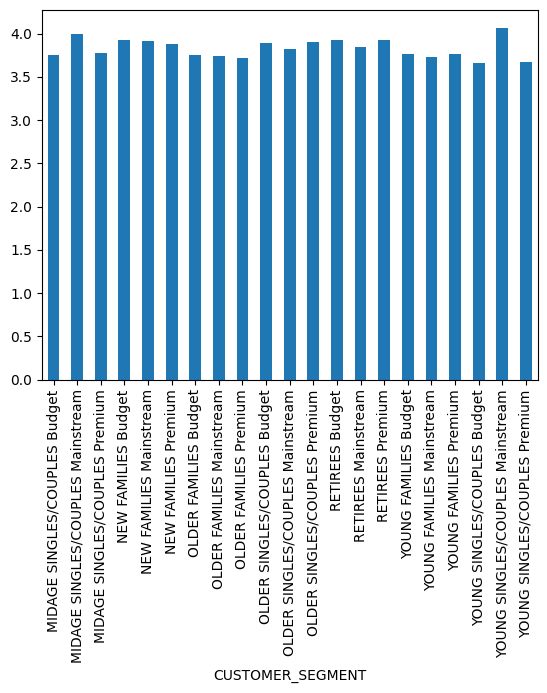

average quantity of transaction per customer


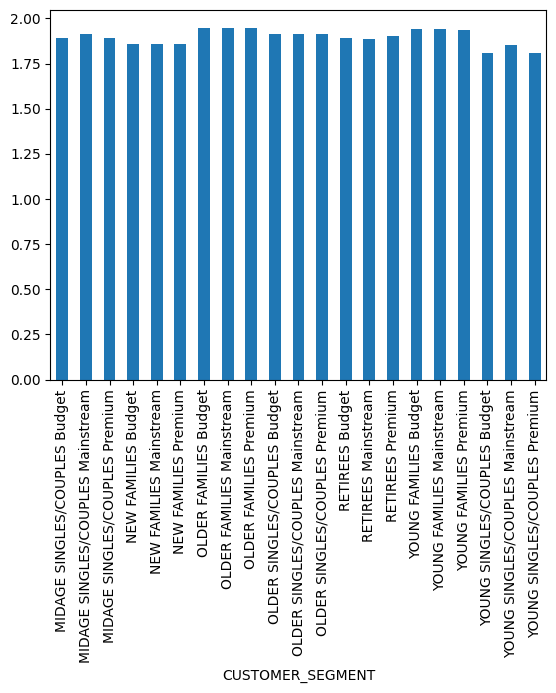

In [16]:
print(transactions)

print("sales per segment")
grouped_sum = transactions.groupby('LIFESTAGE')['TOT_SALES'].sum()
print(grouped_sum)
grouped_sum = transactions.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()
print(grouped_sum)
grouped_sum = transactions.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum().plot(kind='bar')
print(grouped_sum)
plt.show()

print("segment tally")
transactions['CUSTOMER_SEGMENT'] = transactions['LIFESTAGE'] + ' ' + transactions['PREMIUM_CUSTOMER']
transactions['CUSTOMER_SEGMENT'].value_counts().plot(kind='bar')
plt.show()

print("average quantity per transaction")
mean_quantity = transactions.groupby(['CUSTOMER_SEGMENT'])['PROD_QTY'].mean().plot(kind='bar')
plt.show()

print("average packet price per unit across segments")
transactions['CHIP_PRICE'] = transactions['TOT_SALES'] / transactions['PROD_QTY']
mean_price = transactions.groupby(['CUSTOMER_SEGMENT'])['CHIP_PRICE'].mean()
mean_price.plot(kind='bar')
print(mean_price )
plt.show()

print("average quantity of transaction per customer")
averages = transactions.groupby(['CUSTOMER_SEGMENT'])['PROD_QTY'].sum() / transactions['CUSTOMER_SEGMENT'].value_counts()
averages.plot(kind='bar')
plt.show()

In [17]:
import scipy.stats as stats


# Perform independent t-test
msy = transactions[transactions['CUSTOMER_SEGMENT'] == 'YOUNG SINGLES/COUPLES Mainstream']
py = transactions[transactions['CUSTOMER_SEGMENT'] == 'YOUNG SINGLES/COUPLES Premium']
by = transactions[transactions['CUSTOMER_SEGMENT'] == 'YOUNG SINGLES/COUPLES Budget']
msm = transactions[transactions['CUSTOMER_SEGMENT'] == 'MIDAGE SINGLES/COUPLES Mainstream']
pm = transactions[transactions['CUSTOMER_SEGMENT'] == 'MIDAGE SINGLES/COUPLES Premium']
bm = transactions[transactions['CUSTOMER_SEGMENT'] == 'MIDAGE SINGLES/COUPLES Budget']

print("young")
print("ms vs prem")
t_stat, p_value = stats.ttest_ind(msy['CHIP_PRICE'], py['CHIP_PRICE'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

print("prem vs budget")
t_stat, p_value = stats.ttest_ind(py['CHIP_PRICE'], by['CHIP_PRICE'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

print("ms vs budget")
t_stat, p_value = stats.ttest_ind(msy['CHIP_PRICE'], by['CHIP_PRICE'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

print("ms vs prem")
t_stat, p_value = stats.ttest_ind(msm['CHIP_PRICE'], pm['CHIP_PRICE'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

print("prem vs budget")
t_stat, p_value = stats.ttest_ind(pm['CHIP_PRICE'], bm['CHIP_PRICE'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

print("ms vs budget")
t_stat, p_value = stats.ttest_ind(msm['CHIP_PRICE'], bm['CHIP_PRICE'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

young
ms vs prem
T-statistic: 26.02605977993766, P-value: 2.1952170736955337e-147
prem vs budget
T-statistic: 0.33971441997794716, P-value: 0.7340765859686966
ms vs budget
T-statistic: 30.27154576866263, P-value: 4.274696118218766e-198
ms vs prem
T-statistic: 14.200698323598381, P-value: 1.5681587702199162e-45
prem vs budget
T-statistic: 1.152529756056807, P-value: 0.2491259890896746
ms vs budget
T-statistic: 13.507259711529551, P-value: 2.411773252100231e-41


{'Kettle': 3844, 'Pringles': 2315, 'Doritos': 2076, 'Smiths': 1718, 'Thins': 1166, 'Infuzions': 962, 'Twisties': 900, 'Tostitos': 890, 'RRD': 875, 'Cobs': 864, 'Tyrrells': 619, 'Grain': 576, 'WW': 423, 'Cheezels': 346, 'Natural': 321, 'Dorito': 303, 'Infzns': 288, 'CCs': 222, 'Cheetos': 166, 'Smith': 131, 'French': 78, 'NCC': 73, 'Snbts': 71, 'GrnWves': 70, 'Burger': 62, 'Sunbites': 57, 'Woolworths': 56}
27968.023315529997 0.0
178.44905505341004 64.01102725484878
175.73349884427702 59.57380343341888
['70' '90' '110' '125' '134' '135' '150' '160' '165' '170' '175' '180'
 '190' '200' '210' '220' '250' '270' '330' '380']


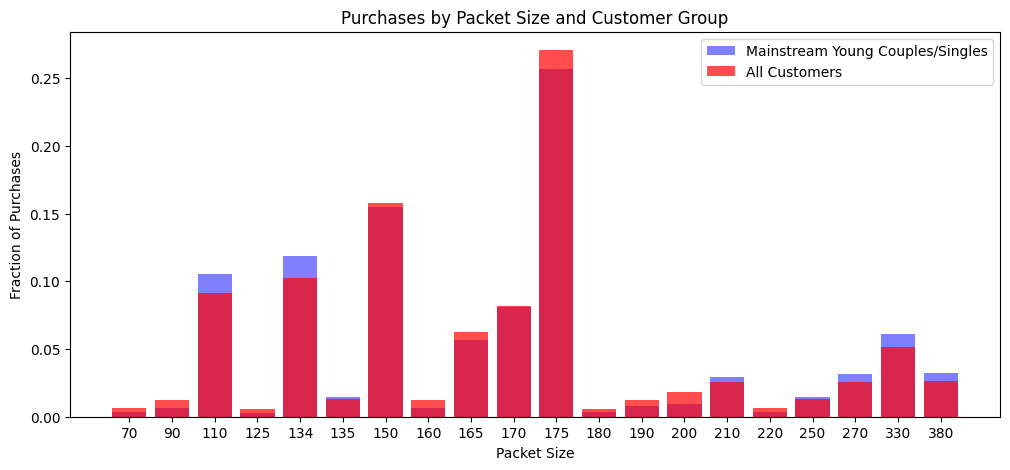

In [18]:
import statistics

brand_counts = msy['PROD_BRAND'].value_counts().to_dict()
print(brand_counts)

observed = np.array(list(brand_counts.values()))

# Expected purchases assuming no preference (uniform distribution)
expected = np.array(list([sum(observed) / len(observed)] * len(observed)))  # Equal expected purchases for all brands

chi_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
print(chi_stat, p_value)

msy_sizes = msy['PROD_SIZE'].value_counts().sort_index()
print(msy['PROD_SIZE'].mean(), msy['PROD_SIZE'].std())
all_sizes = transactions['PROD_SIZE'].value_counts().sort_index()
print(transactions['PROD_SIZE'].mean(), transactions['PROD_SIZE'].std())
packet_sizes = msy_sizes.to_dict().keys()
packet_sizes = [str(x) for x in packet_sizes]
packet_sizes = np.array(packet_sizes)
print(packet_sizes)

msy_standard = msy_sizes / msy_sizes.sum()
all_standard = all_sizes / all_sizes.sum()

plt.figure(figsize=(12, 5))
bar_width = 20
# Create side-by-side bars
plt.bar(packet_sizes, msy_standard, label="Mainstream Young Couples/Singles", alpha=0.5, color='blue')
plt.bar(packet_sizes, all_standard, label="All Customers", alpha=0.7, color='red')

# Labels and title
plt.xlabel("Packet Size")
plt.ylabel("Fraction of Purchases")
plt.title("Purchases by Packet Size and Customer Group")
plt.xticks(packet_sizes)  # Ensure x-axis labels match packet sizes

plt.legend()

